# Project Desription
#### PROBLEM STATEMENT <i>(according to the data provider on Kaggle)</i>     

"India is one of the fastest developing nations of the world and trade between nations is the major component of any developing nation. This dataset includes the trade data for India for commodities in the HS2 basket.The dataset consists of trade values for export and import of commodities in million US$."

##### GOAL OF THE PROJECT    

We are required to model the trade between India and other countries, and do Hypothesis Testing on various exploratory questions and make efficient visualizations to convey the results of those testing results.  

##### DATA SOURCE  
* FROM Kaggle - https://www.kaggle.com/lakshyaag/india-trade-data#2018-2010_import.csv

**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 

# library for data analsysis and man

import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


# Loading the data.

**Okay so we have the two following datasets, representing the EXPORT and IMPORT trade done by India from 2010 to 2018 respectively -**  
* 2018-2010_export.csv - export data
* 2018-2010_import.csv - import data

In [2]:
export_data = pd.read_csv('data/2018-2010_export.csv')
import_data = pd.read_csv('data/2018-2010_import.csv')

print(export_data.shape, import_data.shape) # let's see the size f our datasets.

(137023, 5) (76124, 5)


In [3]:
export_data.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
import_data.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


# EDA and data cleaning.

### Exploring the 'Commodity' features in both of our datasets.

In [20]:
# making a list of the unique commodities for both of our datasets.
import_commodities = (import_data['Commodity'].unique().tolist())
export_commodities = (export_data['Commodity'].unique().tolist())

# filtering the common commodities
common_commodities = set(import_commodities).intersection(export_commodities)

# if the lenght of the above three lists is same, then we can assume that the commodities in both of our features are identicle
print('''Length of commodities in import data : {}\nLenght of commodities in export data : {}\nLenght of common commodities : {}'''
      .format(len(import_commodities), len(export_commodities), len(common_commodities)))

Length of commodities in import data : 98
Lenght of commodities in export data : 98
Lenght of common commodities : 98


**Let's check for duplicates in the feature 'Commodity' for both the datasets.**

In [21]:
print('Duplicates in import dataset are :\n{}\nDuplicates in export dataset are :\n{}'
      .format(import_data['Commodity'].duplicated().value_counts(), export_data['Commodity'].duplicated().value_counts()))

Duplicates in import dataset are :
True     76026
False       98
Name: Commodity, dtype: int64
Duplicates in export dataset are :
True     136925
False        98
Name: Commodity, dtype: int64


**Okay so we can see from above that there are a lot of duplicates in both the datasets, from which we can naively assume that these duplicates are the reason behind the mismatch of the lenght between the datasets.  
Another possible reasoning behind the mismatch of the lengths of both the datasets can be that; a country (INDIA in this case) in a given year dose not execute the same levels of export and import with another given country.  
And also the fact that one commodity can be an dprobably is being traded with multiple countries in a given year, which results in duplicate values of this feature in our datasets.  
That is, in other words, the import and export levels are not same with a country, and also not does not show a similar repetative proportion with other countries.**

**Let's also check the top 10 most popular 'Commodity' that is traded for both import and export purposes.**

In [90]:
imp_comm_freq =pd.DataFrame(import_data['Commodity'].value_counts())
imp_comm_freq.head(10)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1778
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1711
MISCELLANEOUS GOODS.,1533
PLASTIC AND ARTICLES THEREOF.,1525
IRON AND STEEL,1502
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1418
ALUMINIUM AND ARTICLES THEREOF.,1405
ARTICLES OF IRON OR STEEL,1329
COPPER AND ARTICLES THEREOF.,1245
RUBBER AND ARTICLES THEREOF.,1207


In [91]:
exp_comm_freq =pd.DataFrame(export_data['Commodity'].value_counts())
exp_comm_freq.head(10)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1963
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1945
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1917
PHARMACEUTICAL PRODUCTS,1916
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",1907
ARTICLES OF IRON OR STEEL,1880
PLASTIC AND ARTICLES THEREOF.,1872
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",1866
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,1865
MISCELLANEOUS GOODS.,1856


### Exploring the 'country'  feature in both of our datasets.
**So from the above summarizations, let's figure out the number of countries India has conducted export and import.**

In [31]:
importing_countries = import_data['country'].unique().tolist()
exporting_countries = export_data['country'].unique().tolist()
print('''Number of countries India conducted imports are : {}\n
Number of countries India conducted exports are : {}\n'''
.format(len(importing_countries), len(exporting_countries)))

Number of countries India conducted imports are : 242

Number of countries India conducted exports are : 248



**Let's see what are the countries India conducted both import and export from 2010 to 2018.**

In [35]:
'''if the lenght of countries India conducted import and export respectively are equal,
then the countries India conducted trade from 2010 to 2018 are same'''
if len(importing_countries) == len(exporting_countries):
    print('The countries India conducted trade from 2010 to 2018 are same.')
elif len(importing_countries) != len(exporting_countries):
    print('The countries India conducted trade from 2010 to 2018 are not same.')
    countries_diff = set(importing_countries).union(exporting_countries) - set(importing_countries).intersection(exporting_countries)
# the countries India conducted both import and export are the following
common_countries = set(importing_countries).intersection(exporting_countries)
print('''The number of common countries India conducted trade are : {}\n
The countries that India did not conduct both import and export are \n{}'''.format(len(common_countries), countries_diff))

The countries India conducted trade from 2010 to 2018 are not same.
The number of common countries India conducted trade are : 242

The countries that India did not conduct both import and export are 
{'INSTALLATIONS IN INTERNATIONAL WATERS   ', 'CANARY IS', 'SAHARWI A.DM RP', 'CURACAO', 'NEUTRAL ZONE', 'SINT MAARTEN (DUTCH PART)'}


### Exploring the feature 'HSCode' in both of our datasets.

The **Harmonized Commodity Description and Coding System**, also known as the **Harmonized System (HS) of tariff nomenclature** is an internationally standardized system of names and numbers to classify traded products. It came into effect in 1988 and has since been developed and maintained by the World Customs Organization (WCO) (formerly the Customs Co-operation Council), an independent intergovernmental organization based in Brussels, Belgium, with over 200 member countries.  

The HS is organized logically by economic activity or component material. For example, animals and animal products are found in one section of the HS, while machinery and mechanical appliances are found in another. The HS is organized into 21 sections, which are subdivided into 99 chapters. The 99 HS chapters are further subdivided into 1,244 headings and 5224 subheadings.

Section and Chapter titles describe broad categories of goods, while headings and subheadings describe products in more detail. Generally, HS sections and chapters are arranged in order of a product's degree of manufacture or in terms of its technological complexity. Natural commodities, such as live animals and vegetables, for example, are described in the early sections of the HS, whereas more evolved goods such as machinery and precision instruments are described in later sections. Chapters within the individual sections are also usually organized in order of complexity or degree of manufacture.  

* <i>from wikipedia</i> : https://en.wikipedia.org/wiki/Harmonized_System  

**Let's check the HSCode for both import and export data.**

In [53]:
import_hscodes = import_data['HSCode'].value_counts().index.sort_values(ascending=True)
print('''The number of HS-codes in import dataset are : {}\n
The HS-codes in import dataset are as follows :\n{}'''
.format(len(import_data['HSCode']), import_hscodes))

The number of HS-codes in import dataset are : 76124

The HS-codes in import dataset are as follows :
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')


In [54]:
export_hscodes = export_data['HSCode'].value_counts().index.sort_values(ascending=True)
print('''The number of HS-codes in export dataset are : {}\n
The HS-codes in export dataset are as follows :\n{}'''
.format(len(export_data['HSCode']), export_hscodes))

The number of HS-codes in export dataset are : 137023

The HS-codes in export dataset are as follows :
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')


**Let's check for HS-codes in both of the datasets that are not common.**

In [58]:
hscodes_diff = set(import_hscodes).union(export_hscodes) - set(import_hscodes).intersection(export_hscodes)
if len(hscodes_diff) == 0:
    print('The HS-codes which are not common for both the datasets are : None')
else :
    print('The HS-codes which are common for both the datasets are :', hscodes_diff)

The HS-codes which are not common for both the datasets are : None


**Let's check the length of the HS-codes for both of the datasets.**

In [60]:
print('''Number of HS-codes in import dataset are {}\n
Number of HS-codes in export datasets are {}'''.format(len(import_hscodes), len(export_hscodes)))

Number of HS-codes in import dataset are 98

Number of HS-codes in export datasets are 98


**As we can see from above that there are 98 HS-codes in both of the datasets, where as we know that there are 99 HS-codes in the system. So let's figure out the missing HS-code from both ofour datasets, and also the reason behind it.**

In [69]:
'''normally HS-codes should be from 1 to 99, 
hence making a list of integers from 1 to 99 first, for comparison.
Because of the fact that the HS-codes present in both of the import and export datasets are same,
hence if the missing HS-code is found for one of the datasets, 
it also implies the missing HS-code in the other dataset.
'''
hscodes = (np.arange(1,100)).tolist()
missing_hscode = set(import_hscodes).union(hscodes) - set(import_hscodes).intersection(hscodes)
print('The missing HS-code from both of our datasets is  : ', missing_hscode)

The missing HS-code from both of our datasets is  :  {77}


**Okay so we have the HS-code > 77 missing from our datasets. The reason behind is that according to the HS system the HSCode 77 is actually reserved for possible future use.**

### Let's check the 'value' feature in both of the datasets.

**Due to the fact that the feature 'value' is a numerical features, let's do a descriptive statistical analysis of it.**

In [95]:
import_data[['value']].describe()

,value
count,64536.000000
mean,62.361425
std,666.327177
min,0.000000
25%,0.030000
50%,0.370000
75%,4.780000
max,32781.570000


In [96]:
export_data[['value']].describe()

,value
count,122985.000000
mean,21.567829
std,229.701279
min,0.000000
25%,0.030000
50%,0.360000
75%,3.770000
max,19805.170000


**Observations :**  
* In the export dataset, the feature 'value' is showing a huge outlier; as 75 % data is below 3.7 and maximum is 19805 seems some items category are very expensive; also the minimum is zero as some export may be two small to roundoff in two decimal.  
* In the import dataset, the feature 'value' is showing a huge outlier as 75 % data is below 4.9 and maximum is 32781 seems some items category are very expensive; and also the minimum is zero as some import may be two small.

### Exploring the feature 'year'.

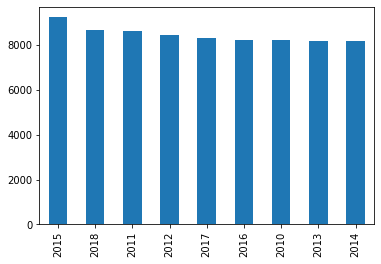

In [98]:
(import_data['year'].value_counts()).plot.bar()

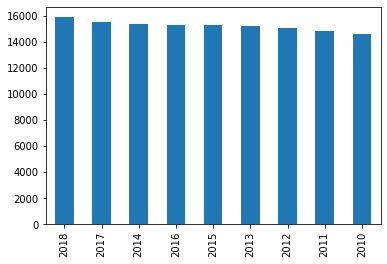

In [99]:
(export_data['year'].value_counts()).plot.bar()